In [9]:
import matplotlib
import matplotlib.pyplot as plt
import scipy
import multiprocessing
from joblib import Parallel, delayed
import glob
import os
import sys
import gc
import librosa.display

import numpy as np
import seaborn as sb
import pandas as pd
import librosa
import pydub

import IPython.display
import pickle
import logging
import time
import datetime
import IPython.display as ipd

In [2]:
import os
os.getcwd()

'/home/jupyter'

In [3]:
filename = 'musicnet_metadata.csv'
data = pd.read_csv(filename)
data.head(20)

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546
5,1734,Schubert,Piano Sonata in A major,3. Scherzo. Allegro vivace,Solo Piano,Museopen,Segundo G. Yogore,D959,325
6,1735,Schubert,Piano Sonata in A major,4. Rondo. Allegretto,Solo Piano,Museopen,Segundo G. Yogore,D959,714
7,1739,Schubert,Piano Trio in B-flat major,4. Rondo. Allegro vivace,Piano Trio,European Archive,harfesoft.de,OP99,490
8,1742,Schubert,String Quintet in C major,2. Adagio,Viola Quintet,European Archive,harfesoft.de,OP163,924
9,1749,Schubert,Piano Sonata in A minor,1. Moderato,Solo Piano,Museopen,Segundo G. Yogore,D845,696


In [4]:
data = pd.read_csv(filename)
num = 1727
hi = 'Piano'

# data.loc[data['id'] == int(num)]['composer'][data.index[data['id'] == int(num)][0]]
if hi in data.loc[data['id'] == int(num)]['ensemble'][data.index[data['id'] == int(num)][0]]:
    print('hi')


hi


In [28]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += (window_size / 2)

#Calculate Mel Spectrograms and Corresponding Deltas
def extract_features(parent_dir,sub_dirs,file_ext="*.wav",bands = 60, frames = 1772):
    filename = 'musicnet_metadata.csv'
    instrument = 'piano'
    data = pd.read_csv(filename)
    window_size = 512 * (frames - 1)
    log_specgrams = []
    labels = []
    for l, sub_dir in enumerate(sub_dirs):
        print(sub_dir)
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            num = fn.split('/')[2].split('.')[0]
            if 1 ==1:
                sound_clip,s = librosa.load(fn)
                IPython.display.clear_output()
#             num = fn.split('/')[2].split('.')[0]
                print(num)
#                 plt.close()
                composer = data.loc[data['id'] == int(num)]['composer'][data.index[data['id'] == int(num)][0]]
#             label = fn.split('/')[2].split('-')[1]
                label = composer
                for (start,end) in windows(sound_clip,window_size):
                    if(len(sound_clip[start:end]) == window_size):
                    
                        signal = sound_clip[start:end]
                        melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
                        logspec = librosa.amplitude_to_db(melspec)
                        logspec = logspec.T.flatten()[:, np.newaxis].T
#                     print(np.shape(logspec))
                        if np.mean(logspec)>-80.0 : #get rid of silent frames
#                       print(len(log_specgrams))
                            log_specgrams.append(logspec)
                            plt.figure(figsize=(10, 4))
                            librosa.display.specshow(librosa.amplitude_to_db(melspec),y_axis='mel', fmax=22050, x_axis='time',hop_length = 512,sr=44100)
                            plt.colorbar(format='%+2.0f dB')
                            plt.title('Mel spectrogram: 60 bands')
                            plt.tight_layout()
                            plt.show()
                            stft = scipy.signal.stft(signal, 44100, window='hamm', nfft=2048, nperseg=2001)
                           
                            plt.figure(figsize=(10, 4))
                            proc_stft = (np.abs(stft))
                            librosa.display.specshow(proc_stft, sr=44100, y_axis = 'linear',x_axis = 'time')
                            plt.colorbar()
                            plt.title('Mel spectrogram: 60 bands')
                            plt.tight_layout()
                            plt.show()
                            log_specgrams.append(logspec)
                            labels.append(label)
                 
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    features = log_specgrams
#     features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
#     for i in range(len(features)):
#         features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
    return np.array(features), labels

#hot encode labels
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [ ]:
#Load Data and Extract Features
parent_dir = 'musicnet/'
# parent_dir = '../UrbanSound8k/audio'
# sub_dirs= ['fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10']
# sub_dirs = ['train_data','test_data']
sub_dirs = ['testF'] 
featuresTrain3,labels_origTrain3 = extract_features(parent_dir,sub_dirs)

testF


In [84]:
import numpy as np
# BASE_PATH = '../gdrive/Team Drives/CS269 Project/dataUnzipped/'
file_name_features = 'featuresFile3_20sPiano'
np.savez(file_name_features,featuresTrain3)
# np.savez( os.path.join(BASE_PATH, file_name_features), featuresTrain3 )   
# BASE_PATH = '../gdrive/Team Drives/CS269 Project/dataUnzipped/'
file_name_labels = 'LabelFile3_20sPiano'
np.savez(file_name_labels,labels_origTrain3)
# np.savez( os.path.join(BASE_PATH, file_name_labelsPiano), labels_origTrain3)  
# del featuresTrain1,labels_origTrain1

In [83]:
np.unique(labels_origTrain3)

array(['Bach', 'Beethoven', 'Brahms', 'Faure', 'Mozart', 'Schubert'],
      dtype='<U9')

In [78]:
meta_df = pd.read_csv('musicnet_metadata.csv')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


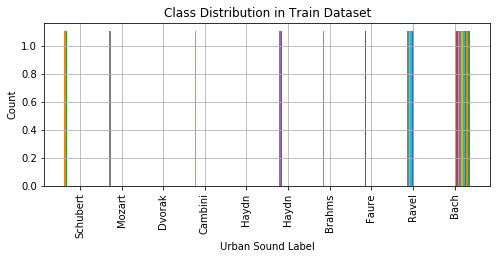

In [79]:
meta_df['composer'].hist(rwidth=0.75, align="left", figsize=(8,3), normed=1)
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Urban Sound Label')
plt.ylabel('Count')
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 9, step=9/10))
plt.setp(labels, rotation=90)
plt.show()

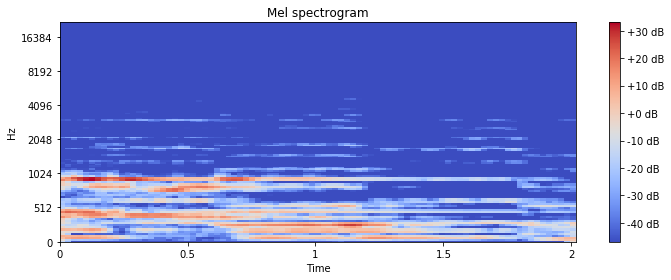

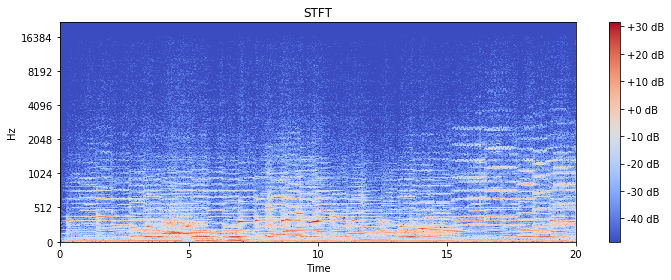

In [35]:



# ipd.Audio('musicnet/train_data/1727.wav')
signal = sound_clip[100000:144100]
# import IPython.display as ipd
# ipd.Audio(signal) # load a local WAV file
# X = librosa.stft(signal)
# Xdb = librosa.amplitude_to_db(abs(X))
melspec = librosa.feature.melspectrogram(signal, n_mels = 128)
logspec = librosa.amplitude_to_db(melspec)
# logspec = logspec.T.flatten()[:, np.newaxis].T
# #                     print(np.shape(logspec))
                    
plt.figure(figsize=(10, 4))
librosa.display.specshow(logspec,y_axis='mel', fmax=22050, x_axis='time',hop_length = 512)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb,y_axis='mel', fmax=22050, x_axis='time',hop_length = 512)
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.tight_layout()
plt.show()
                  
                        

In [ ]:
sound_clip,s = librosa.load('musicnet/train_data/1727.wav')

In [33]:
np.mean(logspec)

-53.266752766864826